In [10]:
import os
import pandas as pd
from pathlib import Path

def count_images_in_subfolders(root_dir):
    """
    统计指定目录下所有子文件夹中的图片数量
    :param root_dir: 根目录路径
    :return: 包含统计结果的DataFrame
    """
    stats = []
    
    # 遍历根目录下的所有子文件夹
    for animal_folder in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, animal_folder)
        
        if os.path.isdir(folder_path):
            # 统计该文件夹中的图片数量
            image_count = len([f for f in os.listdir(folder_path) 
                             if f.lower().endswith(('.jpg', '.jpeg', '.png', 'webp'))])
            
            stats.append({
                'Animal': animal_folder,
                'ImageCount': image_count
            })
    
    # 转换为DataFrame并排序
    df = pd.DataFrame(stats)
    df = df.sort_values('ImageCount', ascending=False)
    
    return df

if __name__ == "__main__":
    # 设置animal_dataset文件夹路径
    dataset_path = "h:\\project\\Animals\\animal_dataset"
    
    # 统计图片数量
    result_df = count_images_in_subfolders(dataset_path)
    
    # 输出结果
    print("动物类别图片数量统计:")
    print(result_df)
    
    # 保存到CSV文件
    result_df.to_csv('animal_image_counts.csv', index=False)
    print("\n结果已保存到animal_image_counts.csv")

动物类别图片数量统计:
       Animal  ImageCount
61      otter         443
65     parrot         443
79    scallop         440
86    sparrow         439
24  dragonfly         438
..        ...         ...
66    peacock         329
31       frog         328
80   scorpion         324
10   capybara         318
64   pangolin         313

[100 rows x 2 columns]

结果已保存到animal_image_counts.csv


In [9]:
import os
import shutil
from PIL import Image

def process_file(input_path, output_path):
    try:
        # 检查文件是否存在
        if not os.path.exists(input_path):
            print(f"File not found: {input_path}")
            return False
            
        # 如果是PNG文件，直接复制
        if input_path.lower().endswith('.png'):
            shutil.copy2(input_path, output_path)
            print(f"Copied PNG: {input_path} -> {output_path}")
            return True
        else:
            # 其他格式则转换
            img = Image.open(input_path)
            img.save(output_path, 'PNG')
            print(f"Converted to PNG: {input_path} -> {output_path}")
            return True
    except Exception as e:
        print(f"Error processing {input_path}: {e}")
        return False

def process_directory(root_dir, output_dir):
    # 检查输入目录是否存在
    if not os.path.exists(root_dir):
        print(f"Input directory not found: {root_dir}")
        return
        
    # 创建输出目录
    os.makedirs(output_dir, exist_ok=True)
    
    for root, dirs, files in os.walk(root_dir):
        for file in files:
            # 处理所有图片文件
            if file.lower().endswith(('.webp', '.jpeg', '.gif', '.jpg', '.svg', '.png')):
                input_path = os.path.join(root, file)
                # 保持原始目录结构
                relative_path = os.path.relpath(root, root_dir)
                output_subdir = os.path.join(output_dir, relative_path)
                os.makedirs(output_subdir, exist_ok=True)
                
                # 输出文件保持原文件名，但非PNG文件会转换为PNG格式
                output_path = os.path.join(output_subdir, os.path.splitext(file)[0] + '.png')
                
                if process_file(input_path, output_path):
                    print(f"Successfully processed {input_path}")

if __name__ == "__main__":
    dataset_path = os.path.join('animal_dataset/giraffe1')
    output_path = os.path.join('animal_dataset/giraffe2')
    print(f"Starting processing from {dataset_path} to {output_path}")
    process_directory(dataset_path, output_path)
    print("Processing completed")

Starting processing from animal_dataset/giraffe1 to animal_dataset/giraffe2
Error processing animal_dataset/giraffe1\8900000002.svg: cannot identify image file 'animal_dataset/giraffe1\\8900000002.svg'
Converted to PNG: animal_dataset/giraffe1\8900000004.jpeg -> animal_dataset/giraffe2\.\8900000004.png
Successfully processed animal_dataset/giraffe1\8900000004.jpeg
Error processing animal_dataset/giraffe1\8900000268.svg: cannot identify image file 'animal_dataset/giraffe1\\8900000268.svg'
Converted to PNG: animal_dataset/giraffe1\8900000334.webp -> animal_dataset/giraffe2\.\8900000334.png
Successfully processed animal_dataset/giraffe1\8900000334.webp
Converted to PNG: animal_dataset/giraffe1\8900000367.jpeg -> animal_dataset/giraffe2\.\8900000367.png
Successfully processed animal_dataset/giraffe1\8900000367.jpeg
Converted to PNG: animal_dataset/giraffe1\8900000400.webp -> animal_dataset/giraffe2\.\8900000400.png
Successfully processed animal_dataset/giraffe1\8900000400.webp
Converted to

# 图片合并

In [9]:
import os
import shutil

def merge_matching_folders(source_dir, target_dir):
    """
    合并两个目录中名称相同的子文件夹
    :param source_dir: 源目录路径（animal_dataset）
    :param target_dir: 目标目录路径（animal_dataset_png）
    """
    # 获取两个目录中的子文件夹列表
    source_folders = set([f for f in os.listdir(source_dir) 
                         if os.path.isdir(os.path.join(source_dir, f))])
    target_folders = set([f for f in os.listdir(target_dir) 
                         if os.path.isdir(os.path.join(target_dir, f))])
    
    # 找出两个目录中都存在的文件夹
    common_folders = source_folders & target_folders
    
    print(f"找到 {len(common_folders)} 个需要合并的文件夹")
    
    for folder in common_folders:
        source_folder = os.path.join(source_dir, folder)
        target_folder = os.path.join(target_dir, folder)
        
        print(f"正在合并文件夹: {folder}")
        
        # 遍历源文件夹中的所有文件
        for file in os.listdir(source_folder):
            source_file = os.path.join(source_folder, file)
            
            # 只处理图片文件
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.webp', '.gif')):
                target_file = os.path.join(target_folder, file)
                
                # 如果目标文件已存在，则跳过
                if not os.path.exists(target_file):
                    try:
                        shutil.copy2(source_file, target_folder)
                        print(f"已复制: {file}")
                    except Exception as e:
                        print(f"复制 {file} 失败: {e}")
    
    print("合并完成！")

if __name__ == "__main__":
    # 设置目录路径
    source_dataset = "h:\\project\\Animals\\data"
    target_dataset = "h:\\project\\Animals\\animal_dataset_png"
    
    # 检查目录是否存在
    if not os.path.exists(source_dataset):
        print(f"错误：源目录不存在 {source_dataset}")
    elif not os.path.exists(target_dataset):
        print(f"错误：目标目录不存在 {target_dataset}")
    else:
        merge_matching_folders(source_dataset, target_dataset)

找到 85 个需要合并的文件夹
正在合并文件夹: hare
已复制: 01d3d9ad9a.jpg
已复制: 042a0b5233.jpg
已复制: 056fd9df3e.jpg
已复制: 05fdb49161.jpg
已复制: 07d41bb713.jpg
已复制: 084a64267c.jpg
已复制: 11e44ac76f.jpg
已复制: 12a1bfa759.jpg
已复制: 18f7f65b42.jpg
已复制: 1ea309c164.jpg
已复制: 1f20ad9df2.jpg
已复制: 22e3965680.jpg
已复制: 29d9dd26de.jpg
已复制: 2aa2a622ba.jpg
已复制: 2adad2224c.jpg
已复制: 2b0bcfc582.jpg
已复制: 2b2f9828c9.jpg
已复制: 2bd1b0375d.jpg
已复制: 2c5664872f.jpg
已复制: 2e6376db03.jpg
已复制: 322fd5cf0c.jpg
已复制: 32dc384e72.jpg
已复制: 33f92fdda6.jpg
已复制: 36e6220cf5.jpg
已复制: 38e360ba22.jpg
已复制: 39ad28484c.jpg
已复制: 39e806591d.jpg
已复制: 39f160ef89.jpg
已复制: 3c16cbdbd0.jpg
已复制: 3dc8c64dbd.jpg
已复制: 3f6c914c83.jpg
已复制: 3f814cc7c6.jpg
已复制: 41ad954858.jpg
已复制: 41fc953f8d.jpg
已复制: 43f4d1e2e5.jpg
已复制: 4aa4321e68.jpg
已复制: 4b3f086407.jpg
已复制: 4c9b264947.jpg
已复制: 4da241924a.jpg
已复制: 4dae6b6e2f.jpg
已复制: 5f24a9f34d.jpg
已复制: 5fd47836a6.jpg
已复制: 66cd12c754.jpg
已复制: 6d7b2d4edd.jpg
已复制: 6de44dc813.jpg
已复制: 74e2569633.jpg
已复制: 78c72805ac.jpg
已复制: 7a5ccd3580.jpg
已复制: 7c5a1

In [11]:
import os

# 定义数据集路径和输出文件
dataset_path = os.path.join('animal_dataset')
output_file = 'class.txt'

# 获取所有子文件夹名称
class_names = [d for d in os.listdir(dataset_path) 
               if os.path.isdir(os.path.join(dataset_path, d))]

# 按字母顺序排序
class_names.sort()

# 写入到class.txt文件，每行一个类别
with open(output_file, 'w', encoding='utf-8') as f:
    f.write('\n'.join(class_names))

print(f'成功收集了{len(class_names)}个动物类别名称到{output_file}')

成功收集了100个动物类别名称到class.txt


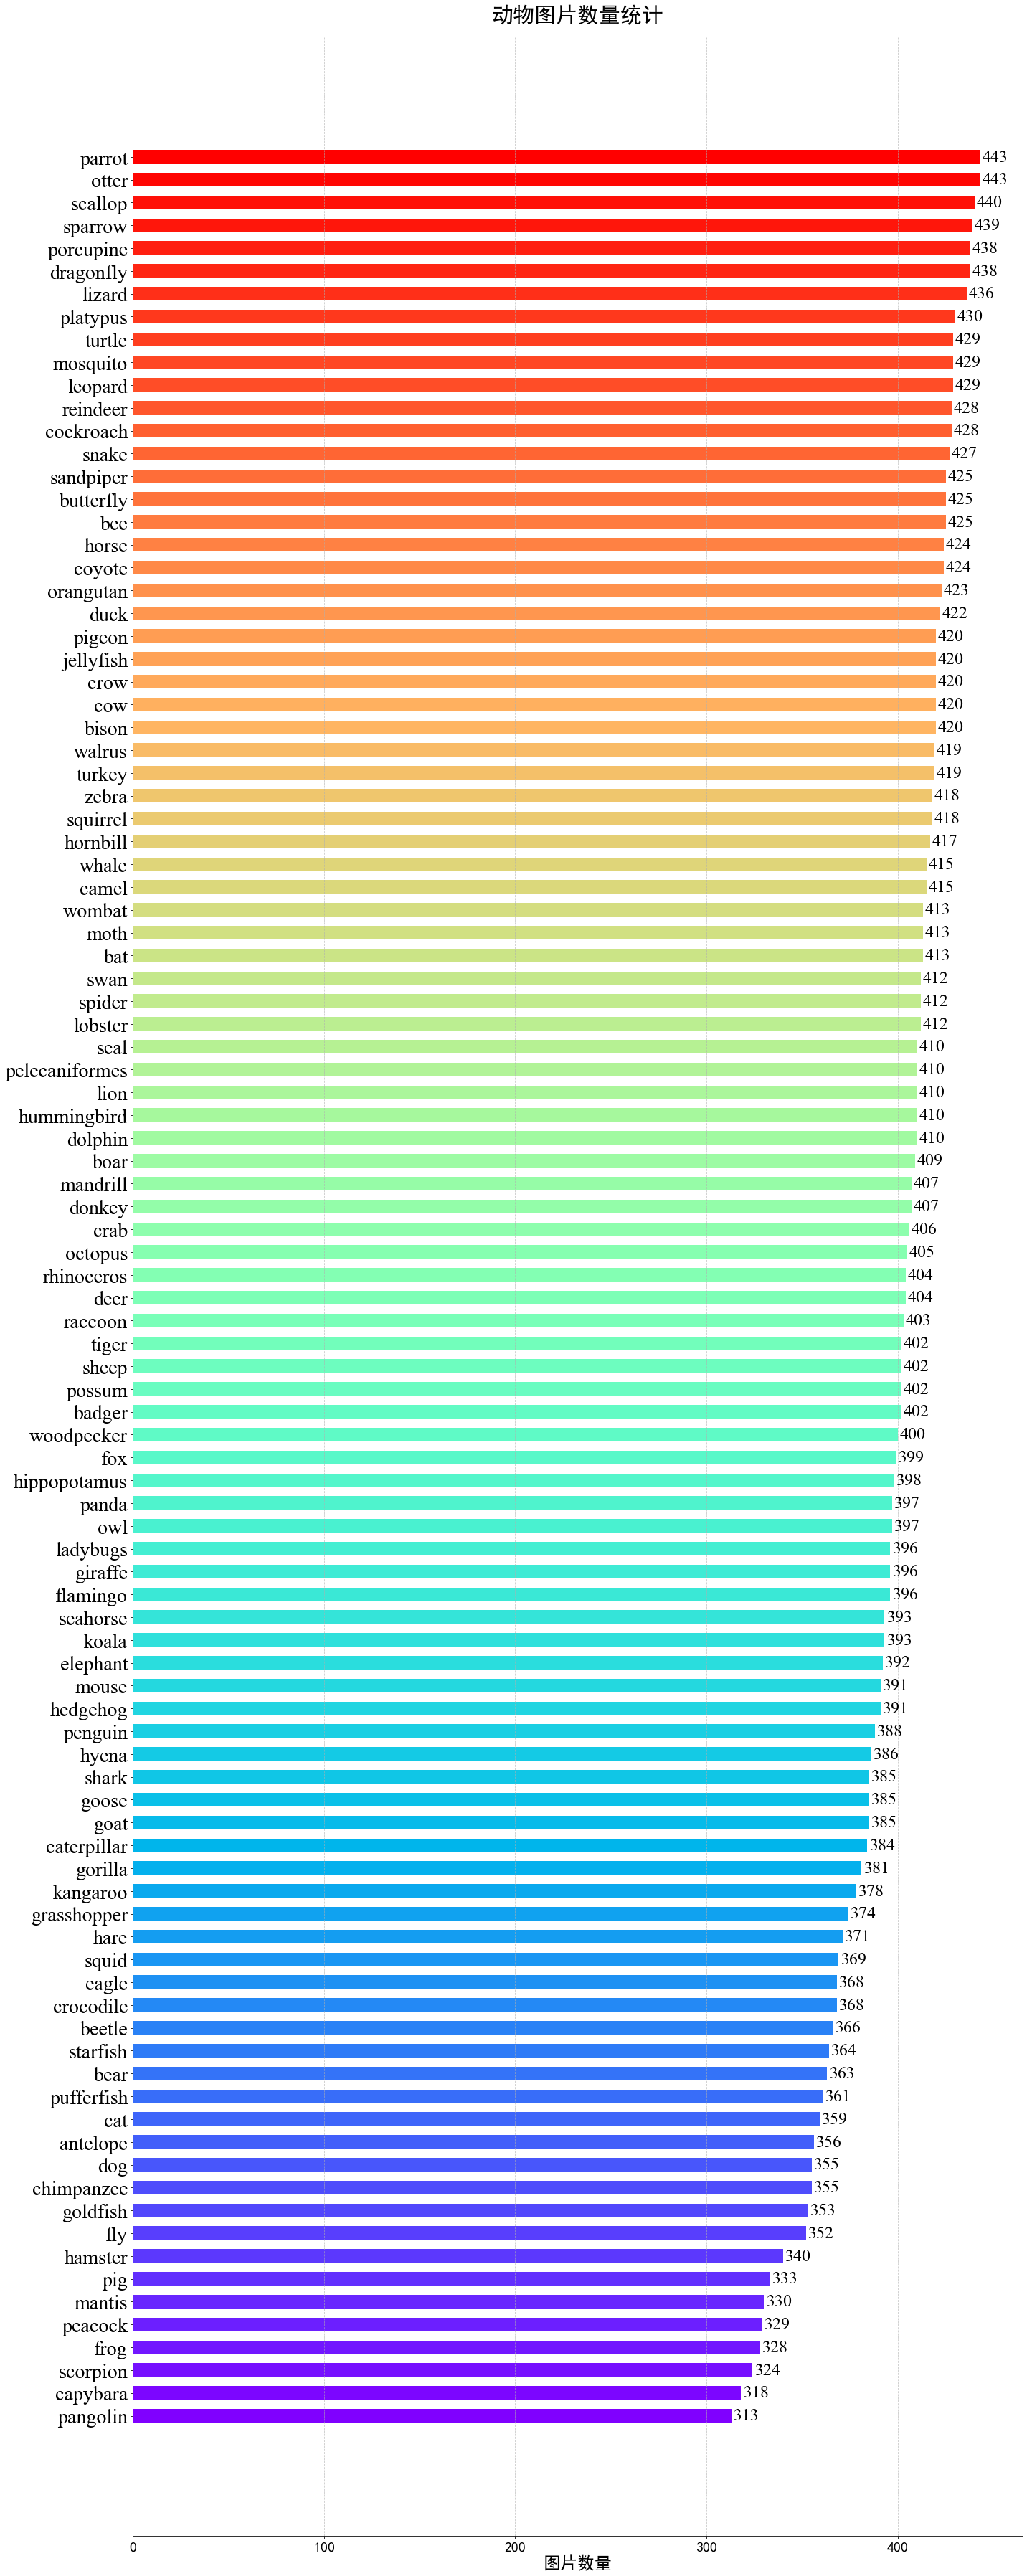

图片数量统计:
pangolin: 313张
capybara: 318张
scorpion: 324张
frog: 328张
peacock: 329张
mantis: 330张
pig: 333张
hamster: 340张
fly: 352张
goldfish: 353张
chimpanzee: 355张
dog: 355张
antelope: 356张
cat: 359张
pufferfish: 361张
bear: 363张
starfish: 364张
beetle: 366张
crocodile: 368张
eagle: 368张
squid: 369张
hare: 371张
grasshopper: 374张
kangaroo: 378张
gorilla: 381张
caterpillar: 384张
goat: 385张
goose: 385张
shark: 385张
hyena: 386张
penguin: 388张
hedgehog: 391张
mouse: 391张
elephant: 392张
koala: 393张
seahorse: 393张
flamingo: 396张
giraffe: 396张
ladybugs: 396张
owl: 397张
panda: 397张
hippopotamus: 398张
fox: 399张
woodpecker: 400张
badger: 402张
possum: 402张
sheep: 402张
tiger: 402张
raccoon: 403张
deer: 404张
rhinoceros: 404张
octopus: 405张
crab: 406张
donkey: 407张
mandrill: 407张
boar: 409张
dolphin: 410张
hummingbird: 410张
lion: 410张
pelecaniformes: 410张
seal: 410张
lobster: 412张
spider: 412张
swan: 412张
bat: 413张
moth: 413张
wombat: 413张
camel: 415张
whale: 415张
hornbill: 417张
squirrel: 418张
zebra: 418张
turkey: 419张
walrus: 419张

In [23]:
import os
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm

# 设置中文字体显示
plt.rcParams['font.sans-serif'] = ['SimHei', 'Times New Roman']  # 中文用黑体，英文用Times New Roman
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 设置data文件夹路径
data_dir = 'animal_dataset'

# 获取所有球员子文件夹
player_folders = [f for f in os.listdir(data_dir) 
                 if os.path.isdir(os.path.join(data_dir, f))]

# 统计每个球员文件夹中的图片数量
player_counts = {}
for player in player_folders:
    player_path = os.path.join(data_dir, player)
    try:
        count = len([f for f in os.listdir(player_path) 
                    if f.lower().endswith(('.png', '.jpg', '.jpeg'))])
        player_counts[player] = count
    except:
        continue

# 按图片数量排序（从多到少）
sorted_players = sorted(player_counts.items(), key=lambda x: x[1], reverse=False)
players = [p[0] for p in sorted_players]
counts = [p[1] for p in sorted_players]

# 创建美观的横向柱状图
plt.figure(figsize=(20, 50))  # 增大图形高度以适应更大的字体

# 使用蓝红色渐变配色
colors = plt.cm.rainbow(np.linspace(0, 1, len(players)))

# 创建横向柱状图，增加条间距
bars = plt.barh(players, counts, color=colors, height=0.6)  # 增大height参数增加条间距

# 添加数据标签（增大字体）
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2,
             f'{int(width)}',
             ha='left', va='center', fontsize=24, fontfamily='Times New Roman')  # 增大数字字体

# 美化图表
plt.title('动物图片数量统计', fontsize=30, pad=20)  # 增大标题字体
plt.xlabel('图片数量', fontsize=24)  # 增大坐标轴标签字体
plt.yticks(fontsize=28, fontfamily='Times New Roman') 
plt.xticks(fontsize=20)  # 增大x轴数字字体
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# 保存图表
plt.savefig('./pic/data.png', dpi=300, bbox_inches='tight')
plt.show()

# 打印统计结果
print("图片数量统计:")
for player, count in sorted_players:
    print(f"{player}: {count}张")

In [1]:
import os
import shutil

# 定义源文件夹和目标文件夹
source_dir = 'Animal'
target_dir = 'Animal_renamed'

# 创建目标文件夹
os.makedirs(target_dir, exist_ok=True)

# 遍历源文件夹中的每个子文件夹
for animal_folder in os.listdir(source_dir):
    source_path = os.path.join(source_dir, animal_folder)
    
    if os.path.isdir(source_path):
        # 在目标文件夹中创建对应的子文件夹
        target_path = os.path.join(target_dir, animal_folder)
        os.makedirs(target_path, exist_ok=True)
        
        # 获取所有图片文件并排序
        image_files = [f for f in os.listdir(source_path) 
                      if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        image_files.sort()
        
        # 重命名并复制文件
        for i, filename in enumerate(image_files, 1):
            ext = os.path.splitext(filename)[1]
            new_name = f"{i}{ext}"
            
            shutil.copy2(
                os.path.join(source_path, filename),
                os.path.join(target_path, new_name)
            )
            
        print(f"已处理 {animal_folder} 文件夹，重命名了 {len(image_files)} 张图片")

print("所有图片重命名完成！")

已处理 antelope 文件夹，重命名了 356 张图片
已处理 badger 文件夹，重命名了 402 张图片
已处理 bat 文件夹，重命名了 413 张图片
已处理 bear 文件夹，重命名了 363 张图片
已处理 bee 文件夹，重命名了 425 张图片
已处理 beetle 文件夹，重命名了 366 张图片
已处理 bison 文件夹，重命名了 420 张图片
已处理 boar 文件夹，重命名了 409 张图片
已处理 butterfly 文件夹，重命名了 425 张图片
已处理 camel 文件夹，重命名了 415 张图片
已处理 capybara 文件夹，重命名了 318 张图片
已处理 cat 文件夹，重命名了 359 张图片
已处理 caterpillar 文件夹，重命名了 384 张图片
已处理 chimpanzee 文件夹，重命名了 355 张图片
已处理 cockroach 文件夹，重命名了 428 张图片
已处理 cow 文件夹，重命名了 420 张图片
已处理 coyote 文件夹，重命名了 424 张图片
已处理 crab 文件夹，重命名了 406 张图片
已处理 crocodile 文件夹，重命名了 368 张图片
已处理 crow 文件夹，重命名了 420 张图片
已处理 deer 文件夹，重命名了 404 张图片
已处理 dog 文件夹，重命名了 355 张图片
已处理 dolphin 文件夹，重命名了 410 张图片
已处理 donkey 文件夹，重命名了 407 张图片
已处理 dragonfly 文件夹，重命名了 438 张图片
已处理 duck 文件夹，重命名了 422 张图片
已处理 eagle 文件夹，重命名了 368 张图片
已处理 elephant 文件夹，重命名了 392 张图片
已处理 flamingo 文件夹，重命名了 396 张图片
已处理 fly 文件夹，重命名了 352 张图片
已处理 fox 文件夹，重命名了 399 张图片
已处理 frog 文件夹，重命名了 328 张图片
已处理 giraffe 文件夹，重命名了 396 张图片
已处理 goat 文件夹，重命名了 385 张图片
已处理 goldfish 文件夹，重命名了 353 张图片
已处理 goose 文件夹，重命名了 385 张图片
